In [17]:
import re
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [23]:
#从文件名提取温度with regular expression
path = r'C:\Users\Dev\Desktop\MPhil-Zipeng Liu\Paperwork\Experiments\US-BTO\Following up with Gian\Sn0\20kvcm\PE loop-heating-20kvcm'
files = os.listdir(path)
print(type(files))
#只提取.tab格式的文件
files_tab = filter(lambda x: x[-4:]=='.tab' , files)

temperature = list()
for i in files_tab:
    num = re.findall(r"\d+.\d+", i)
    temperature.append(num)
# print(temperature)


<class 'list'>


             E      P_SI
250  1957212.0  0.213493
251  1963479.0  0.213924
252  1971654.0  0.214094


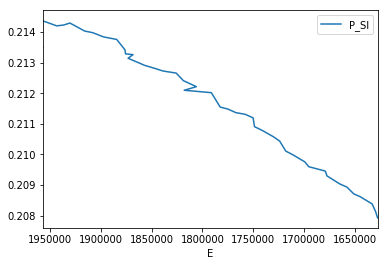

In [50]:
#读取单个的PE loop的文件
df = pd.read_csv(r'C:\Users\Dev\Desktop\MPhil-Zipeng Liu\Paperwork\Experiments\US-BTO\Following up with Gian\Sn0\20kvcm\PE loop-heating-20kvcm\299.98.tab',delimiter='\t')
df.head
#选取PE loop 的upper branch的右端做fitting，整个loop1000个点，upperbranch 250个点，再取50个点做外推
df_PE=df.iloc[250:300, [1,5]]
print(df_PE.head(3))
df_PE.plot(x='E', y='P_SI') 
plt.show()

In [82]:
#用sklearn的函数做linear regression
fittingMatrix=np.matrix(df_PE)
X=fittingMatrix[:,0]
Y=fittingMatrix[:,1]
mdl= LinearRegression().fit(X,Y)
a = mdl.coef_[0]
b = mdl.intercept_
print(a[0])
print(b[0])
# print(X,Y)

3.49690144015e-08
0.0453912685581
[ 814779.51990383]


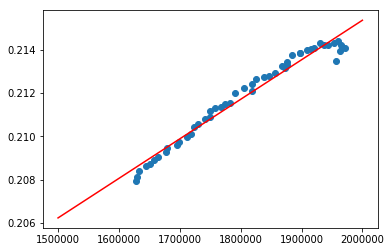

In [27]:
##画fitting line
xx=np.arange(1500000,2000000, 100)
yy=list()
for ii in xx:
    y=ii*a+b
    yy.append(y)
plt.plot(xx,yy,"r")
#画PE loop的散点图
plt.scatter([X],[Y])
plt.show()

In [67]:
#批量操作所有文件
# files = glob.glob(path + "/*.tab")
files = glob(path + "/*.tab")
lst_a=list()
lst_b=list()
lst_T=list()
n=0
for file in files:
    df = pd.read_csv(file,delimiter='\t')
    df_PE=df.iloc[250:300, [1,5]]
    fittingMatrix=np.matrix(df_PE)
    X=fittingMatrix[:,0]
    Y=fittingMatrix[:,1]
    mdl= LinearRegression().fit(X,Y)
    a = mdl.coef_[0]
    b = mdl.intercept_
    T = temperature[n]
    lst_a.append(a[0])
    lst_b.append(b[0])
    lst_T.append(T[0])
    n=n+1
# print(lst_a)
# print("!!!!!!!!!!!!!!!!!!!!!!!!!!")
# print(lst_b)
# print(lst_T)

In [88]:
#将list转化成dictionary，然后转化成DataFrame
dic={"a":lst_a,
  "b":lst_b,
  "T":lst_T}
dt=pd.DataFrame(dic)
dt.head(3)
dt.to_csv(r'C:\Users\Dev\Desktop\MPhil-Zipeng Liu\Paperwork\Experiments\US-BTO\Following up with Gian\Sn0\20kvcm\PE loop-heating-20kvcm\final_matrix.csv')